https://towardsdatascience.com/urban-sound-classification-part-1-99137c6335f9



In [1]:
import IPython.display
IPython.display.Audio(filename='data/Train/2022.wav')


**Load one wave file**

When you load the data, it gives you two objects; a numpy array of an audio file and an int for sampling rate
<br>(sampling rate = Number of samples per second)
<br>sr=None preserves the original sampling rate


In [2]:
import pandas as pd
import numpy as np
import glob 
#import python audio processing library
import librosa
import os
import matplotlib.pyplot as plt
data, sampling_rate = librosa.load('data/Train/2022.wav',sr=None,res_type='kaiser_fast')
print(type(data), type(data[0]),type(sampling_rate))
print(sampling_rate)
print(data.shape)
print(data[0])
print(data.shape[0])

<class 'numpy.ndarray'> <class 'numpy.float32'> <class 'int'>
48000
(192000,)
-0.042663574
192000


The numpy array represents a time-series is a one-dimensional array of a floating points, each which represent the wave's amplitude.

**Plot the amplitude envelope of the waveforms**

Populating the interactive namespace from numpy and matplotlib


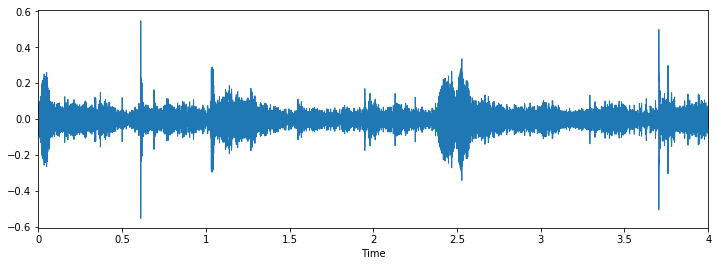

In [3]:
%pylab inline
import librosa.display
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

In [4]:
train = pd.read_csv('data/train.csv') 

In [5]:
def drawDist():
    from plotly.offline import init_notebook_mode, plot, iplot
    import plotly.graph_objs as go
    init_notebook_mode(connected=True)

    data = train['Class'].value_counts().sort_index(ascending=False)
    trace = go.Bar(x = data.index,
               text = ['{:.1f} %'.format(val) for val in (data.values / train.shape[0] * 100)],
               textposition = 'auto',
               textfont = dict(color = '#000000'),
               y = data.values,
               )
    # Create layout
    layout = dict(title = 'Distribution Of {} Sound Classes'.format(train.shape[0]),
              xaxis = dict(title = 'Sound Class'),
              yaxis = dict(title = 'Count'))
    # Create plot
    fig = go.Figure(data=[trace], layout=layout)
    iplot(fig)

In [6]:

classes = train.groupby(['Class']).count()
classes

,ID
Class,
air_conditioner,600
car_horn,306
children_playing,600
dog_bark,600
drilling,600
engine_idling,624
gun_shot,230
jackhammer,668
siren,607


In [7]:
drawDist()

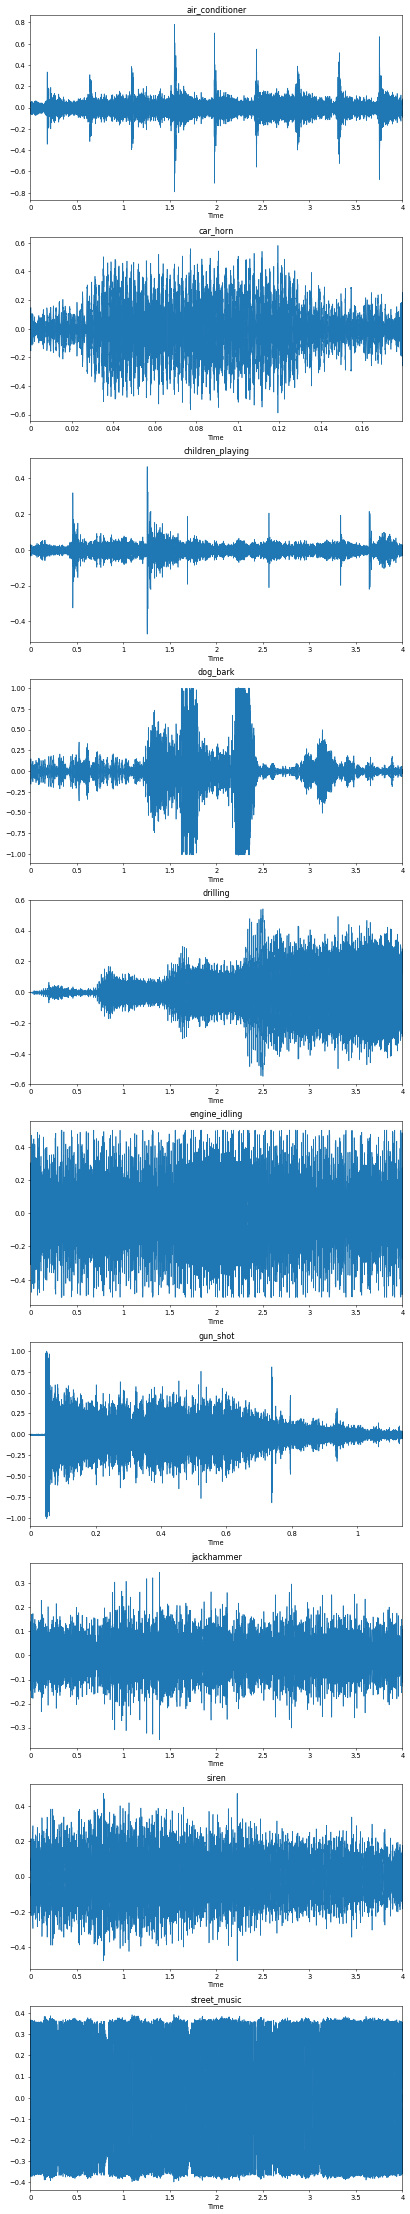

In [8]:
classSamples = train.groupby('Class').first().reset_index()
%matplotlib inline
fig = plt.figure(figsize=(10,60), dpi = 48)
#fig = plt.figure(figsize=(10,24), dpi=35)


for row_index,row in classSamples.iterrows():
    plt.subplot(len(classSamples),1,row_index + 1)
    audio_name = row[1]
    path = os.path.join('data', 'Train', str(audio_name) + '.wav')
    x, sr = librosa.load('data/Train/' + str(row[1]) + '.wav')
    plt.title(row[0])
    librosa.display.waveplot(x, sr=sr)

    
#plt.show()

In [9]:
test = pd.read_csv('data/test.csv')
test['Class'] = 'jackhammer'
test.to_csv('sub01.csv',index=False)

**Load Train Data and Extracting Features**

In [10]:
#path = os.path.join('data', 'Train', str(audio_name) + '.wav')
#for row_index,row in train.head(30).iterrows():
#    print(row_index,row[1])
#    print(os.path.join('data', 'Train', str(row_index) + '.wav'))
    
def parser(row):
    # function to load files and extract features
    #file_name = os.path.join(os.path.abspath(data_dir), 'Train', str(row.ID) + '.wav')
    file_name = os.path.join('data', 'Train', str(row.ID) + '.wav')
    # handle exception to check if there isn't a file which is corrupted
    try:
        # here kaiser_fast is a technique used for faster extraction
        X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        # we extract mfcc feature from data
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None, None

    return (mfccs, row.Class)

temp = train.apply(parser, axis=1)



    

rowID:  0
rowID:  1
rowID:  2
rowID:  3
rowID:  4
rowID:  6
rowID:  10
rowID:  11
rowID:  12
rowID:  15
rowID:  17
rowID:  18
rowID:  19
rowID:  20
rowID:  22
rowID:  24
rowID:  26
rowID:  27
rowID:  32
rowID:  33
rowID:  35
rowID:  36
rowID:  37
rowID:  38
rowID:  40
rowID:  42
rowID:  43
rowID:  44
rowID:  45
rowID:  46
rowID:  47
rowID:  48
rowID:  49
rowID:  50
rowID:  52
rowID:  54
rowID:  56
rowID:  57
rowID:  59
rowID:  60
rowID:  61
rowID:  63
rowID:  65
rowID:  66
rowID:  67
rowID:  68
rowID:  71
rowID:  72
rowID:  74
rowID:  76
rowID:  77
rowID:  78
rowID:  79
rowID:  80
rowID:  81
rowID:  82
rowID:  83
rowID:  84
rowID:  87
rowID:  88
rowID:  90
rowID:  91
rowID:  92
rowID:  93
rowID:  97
rowID:  99
rowID:  100
rowID:  101
rowID:  103
rowID:  104
rowID:  105
rowID:  113
rowID:  114
rowID:  116
rowID:  117
rowID:  118
rowID:  119
rowID:  120
rowID:  121
rowID:  123
rowID:  125
rowID:  128
rowID:  130
rowID:  131
rowID:  132
rowID:  134
rowID:  135
rowID:  136
rowID:  137
rowI

rowID:  1056
rowID:  1058
rowID:  1059
rowID:  1061
rowID:  1062
rowID:  1063
rowID:  1066
rowID:  1068
rowID:  1069
rowID:  1070
rowID:  1071
rowID:  1072
rowID:  1074
rowID:  1076
rowID:  1077
rowID:  1078
rowID:  1079
rowID:  1080
rowID:  1082
rowID:  1083
rowID:  1085
rowID:  1087
rowID:  1088
rowID:  1089
rowID:  1090
rowID:  1091
rowID:  1092
rowID:  1096
rowID:  1098
rowID:  1100
rowID:  1105
rowID:  1106
rowID:  1112
rowID:  1113
rowID:  1115
rowID:  1116
rowID:  1118
rowID:  1119
rowID:  1120
rowID:  1126
rowID:  1129
rowID:  1131
rowID:  1133
rowID:  1134
rowID:  1137
rowID:  1139
rowID:  1143
rowID:  1145
rowID:  1147
rowID:  1148
rowID:  1149
rowID:  1150
rowID:  1151
rowID:  1152
rowID:  1156
rowID:  1157
rowID:  1158
rowID:  1160
rowID:  1162
rowID:  1168
rowID:  1174
rowID:  1175
rowID:  1176
rowID:  1180
rowID:  1181
rowID:  1182
rowID:  1183
rowID:  1186
rowID:  1187
rowID:  1188
rowID:  1189
rowID:  1191
rowID:  1195
rowID:  1200
rowID:  1203
rowID:  1205
rowID:  1206

rowID:  2117
rowID:  2121
rowID:  2122
rowID:  2123
rowID:  2124
rowID:  2125
rowID:  2126
rowID:  2127
rowID:  2129
rowID:  2130
rowID:  2132
rowID:  2133
rowID:  2134
rowID:  2135
rowID:  2138
rowID:  2139
rowID:  2140
rowID:  2141
rowID:  2142
rowID:  2144
rowID:  2145
rowID:  2148
rowID:  2149
rowID:  2150
rowID:  2152
rowID:  2154
rowID:  2156
rowID:  2157
rowID:  2160
rowID:  2162
rowID:  2163
rowID:  2168
rowID:  2169
rowID:  2170
rowID:  2171
rowID:  2173
rowID:  2174
rowID:  2179
rowID:  2180
rowID:  2182
rowID:  2184
rowID:  2185
rowID:  2186
rowID:  2188
rowID:  2190
rowID:  2191
rowID:  2192
rowID:  2193
rowID:  2194
rowID:  2195
rowID:  2196
rowID:  2197
rowID:  2198
rowID:  2199
rowID:  2200
rowID:  2201
rowID:  2204
rowID:  2205
rowID:  2206
rowID:  2209
rowID:  2210
rowID:  2212
rowID:  2216
rowID:  2217
rowID:  2218
rowID:  2219
rowID:  2220
rowID:  2224
rowID:  2225
rowID:  2226
rowID:  2227
rowID:  2228
rowID:  2229
rowID:  2230
rowID:  2233
rowID:  2235
rowID:  2236

rowID:  3152
rowID:  3153
rowID:  3154
rowID:  3155
rowID:  3156
rowID:  3157
rowID:  3159
rowID:  3160
rowID:  3161
rowID:  3162
rowID:  3163
rowID:  3164
rowID:  3165
rowID:  3167
rowID:  3168
rowID:  3169
rowID:  3170
rowID:  3171
rowID:  3172
rowID:  3176
rowID:  3177
rowID:  3178
rowID:  3179
rowID:  3180
rowID:  3182
rowID:  3185
rowID:  3186
rowID:  3187
rowID:  3188
rowID:  3189
rowID:  3190
rowID:  3191
rowID:  3192
rowID:  3194
rowID:  3195
rowID:  3196
rowID:  3197
rowID:  3199
rowID:  3200
rowID:  3202
rowID:  3205
rowID:  3206
rowID:  3207
rowID:  3209
rowID:  3211
rowID:  3213
rowID:  3214
rowID:  3215
rowID:  3216
rowID:  3218
rowID:  3220
rowID:  3221
rowID:  3223
rowID:  3225
rowID:  3226
rowID:  3227
rowID:  3229
rowID:  3230
rowID:  3231
rowID:  3232
rowID:  3233
rowID:  3235
rowID:  3236
rowID:  3237
rowID:  3238
rowID:  3239
rowID:  3240
rowID:  3244
rowID:  3246
rowID:  3248
rowID:  3250
rowID:  3254
rowID:  3257
rowID:  3258
rowID:  3259
rowID:  3261
rowID:  3262

rowID:  4140
rowID:  4142
rowID:  4143
rowID:  4146
rowID:  4155
rowID:  4158
rowID:  4159
rowID:  4160
rowID:  4161
rowID:  4162
rowID:  4163
rowID:  4164
rowID:  4166
rowID:  4168
rowID:  4169
rowID:  4170
rowID:  4171
rowID:  4172
rowID:  4174
rowID:  4175
rowID:  4178
rowID:  4179
rowID:  4180
rowID:  4181
rowID:  4182
rowID:  4183
rowID:  4184
rowID:  4189
rowID:  4190
rowID:  4191
rowID:  4193
rowID:  4197
rowID:  4198
rowID:  4199
rowID:  4200
rowID:  4201
rowID:  4203
rowID:  4204
rowID:  4205
rowID:  4206
rowID:  4207
rowID:  4210
rowID:  4216
rowID:  4217
rowID:  4218
rowID:  4220
rowID:  4222
rowID:  4224
rowID:  4226
rowID:  4227
rowID:  4228
rowID:  4231
rowID:  4232
rowID:  4234
rowID:  4235
rowID:  4236
rowID:  4239
rowID:  4241
rowID:  4242
rowID:  4244
rowID:  4246
rowID:  4247
rowID:  4248
rowID:  4249
rowID:  4252
rowID:  4253
rowID:  4254
rowID:  4255
rowID:  4256
rowID:  4257
rowID:  4260
rowID:  4262
rowID:  4263
rowID:  4265
rowID:  4267
rowID:  4272
rowID:  4273

rowID:  5188
rowID:  5189
rowID:  5190
rowID:  5191
rowID:  5195
rowID:  5196
rowID:  5198
rowID:  5199
rowID:  5200
rowID:  5201
rowID:  5202
rowID:  5205
rowID:  5206
rowID:  5209
rowID:  5210
rowID:  5211
rowID:  5214
rowID:  5216
rowID:  5217
rowID:  5218
rowID:  5219
rowID:  5221
rowID:  5223
rowID:  5225
rowID:  5226
rowID:  5227
rowID:  5228
rowID:  5233
rowID:  5234
rowID:  5236
rowID:  5237
rowID:  5239
rowID:  5241
rowID:  5243
rowID:  5244
rowID:  5246
rowID:  5247
rowID:  5248
rowID:  5251
rowID:  5253
rowID:  5255
rowID:  5257
rowID:  5259
rowID:  5262
rowID:  5263
rowID:  5264
rowID:  5265
rowID:  5266
rowID:  5268
rowID:  5270
rowID:  5271
rowID:  5272
rowID:  5277
rowID:  5278
rowID:  5279
rowID:  5281
rowID:  5283
rowID:  5284
rowID:  5289
rowID:  5290
rowID:  5291
rowID:  5292
rowID:  5294
rowID:  5297
rowID:  5299
rowID:  5302
rowID:  5304
rowID:  5307
rowID:  5308
rowID:  5309
rowID:  5310
rowID:  5312
rowID:  5313
rowID:  5314
rowID:  5315
rowID:  5316
rowID:  5319

rowID:  6234
rowID:  6235
rowID:  6239
rowID:  6241
rowID:  6243
rowID:  6244
rowID:  6245
rowID:  6247
rowID:  6248
rowID:  6249
rowID:  6255
rowID:  6256
rowID:  6258
rowID:  6259
rowID:  6260
rowID:  6262
rowID:  6263
rowID:  6265
rowID:  6266
rowID:  6268
rowID:  6270
rowID:  6271
rowID:  6272
rowID:  6274
rowID:  6278
rowID:  6279
rowID:  6282
rowID:  6283
rowID:  6284
rowID:  6286
rowID:  6287
rowID:  6288
rowID:  6290
rowID:  6291
rowID:  6292
rowID:  6293
rowID:  6294
rowID:  6295
rowID:  6296
rowID:  6297
rowID:  6298
rowID:  6300
rowID:  6304
rowID:  6305
rowID:  6308
rowID:  6309
rowID:  6310
rowID:  6311
rowID:  6314
rowID:  6317
rowID:  6318
rowID:  6319
rowID:  6321
rowID:  6322
rowID:  6323
rowID:  6324
rowID:  6326
rowID:  6327
rowID:  6328
rowID:  6329
rowID:  6331
rowID:  6332
rowID:  6333
rowID:  6335
rowID:  6336
rowID:  6337
rowID:  6338
rowID:  6339
rowID:  6340
rowID:  6341
rowID:  6343
rowID:  6345
rowID:  6346
rowID:  6347
rowID:  6348
rowID:  6351
rowID:  6354

rowID:  7217
rowID:  7218
rowID:  7221
rowID:  7222
rowID:  7223
rowID:  7224
rowID:  7226
rowID:  7227
rowID:  7228
rowID:  7231
rowID:  7232
rowID:  7233
rowID:  7235
rowID:  7240
rowID:  7241
rowID:  7242
rowID:  7244
rowID:  7245
rowID:  7247
rowID:  7249
rowID:  7250
rowID:  7251
rowID:  7252
rowID:  7253
rowID:  7256
rowID:  7257
rowID:  7258
rowID:  7259
rowID:  7260
rowID:  7262
rowID:  7263
rowID:  7264
rowID:  7265
rowID:  7269
rowID:  7272
rowID:  7274
rowID:  7275
rowID:  7277
rowID:  7278
rowID:  7279
rowID:  7280
rowID:  7284
rowID:  7285
rowID:  7287
rowID:  7292
rowID:  7294
rowID:  7297
rowID:  7298
rowID:  7302
rowID:  7305
rowID:  7307
rowID:  7309
rowID:  7311
rowID:  7313
rowID:  7315
rowID:  7316
rowID:  7319
rowID:  7320
rowID:  7321
rowID:  7322
rowID:  7323
rowID:  7326
rowID:  7328
rowID:  7329
rowID:  7330
rowID:  7331
rowID:  7332
rowID:  7333
rowID:  7336
rowID:  7337
rowID:  7338
rowID:  7340
rowID:  7343
rowID:  7344
rowID:  7345
rowID:  7346
rowID:  7347

rowID:  8244
rowID:  8246
rowID:  8247
rowID:  8249
rowID:  8251
rowID:  8252
rowID:  8253
rowID:  8257
rowID:  8258
rowID:  8259
rowID:  8260
rowID:  8261
rowID:  8262
rowID:  8263
rowID:  8264
rowID:  8265
rowID:  8266
rowID:  8268
rowID:  8270
rowID:  8271
rowID:  8272
rowID:  8274
rowID:  8277
rowID:  8279
rowID:  8280
rowID:  8282
rowID:  8283
rowID:  8285
rowID:  8287
rowID:  8289
rowID:  8293
rowID:  8294
rowID:  8296
rowID:  8297
rowID:  8299
rowID:  8300
rowID:  8302
rowID:  8305
rowID:  8306
rowID:  8307
rowID:  8308
rowID:  8310
rowID:  8311
rowID:  8313
rowID:  8314
rowID:  8315
rowID:  8317
rowID:  8318
rowID:  8322
rowID:  8323
rowID:  8324
rowID:  8325
rowID:  8327
rowID:  8330
rowID:  8332
rowID:  8333
rowID:  8334
rowID:  8335
rowID:  8337
rowID:  8338
rowID:  8344
rowID:  8345
rowID:  8346
rowID:  8347
rowID:  8351
rowID:  8352
rowID:  8353
rowID:  8354
rowID:  8356
rowID:  8357
rowID:  8360
rowID:  8361
rowID:  8364
rowID:  8365
rowID:  8366
rowID:  8368
rowID:  8369

**Prepare the data for the deep learning model**

In [17]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

#X = np.array(temp.feature.tolist())
#y = np.array(temp.label.tolist())
(X,y) = (list(map(lambda x: x[0], temp)), list(map(lambda x: x[1], temp)))

lb = LabelEncoder()

y = np_utils.to_categorical(lb.fit_transform(y))

In [22]:
print(X[0])
print(type(X))
X = np.asarray(X)

[-82.12358939 139.50591598 -42.43086489  24.82786139 -11.62076447
  23.49708426 -12.19458986  25.89713885  -9.40527728  21.21042898
  -7.36882138  14.25433903  -8.67870015   7.75023765 -10.1241154
   3.2581183  -11.35261914   2.80096779  -7.04601346   3.91331351
  -2.3349743    2.01242254  -2.79394367   4.12927394  -1.62076864
   4.32620082  -1.03440959  -1.23297714  -3.11085341   0.32044827
  -1.787786     0.44295495  -1.79164752  -0.76361758  -1.24246428
  -0.27664012   0.65718559  -0.50237115  -2.60428533  -1.05346291]
<class 'list'>


**Run the Deep Learning Model**

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 

num_labels = y.shape[1]
filter_size = 2

# build model
model = Sequential()

model.add(Dense(256, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

**Fit Model**

In [24]:
#model.fit(X, y, batch_size=32, epochs=5, validation_data=(val_x, val_y))
model.fit(X, y, batch_size=32, epochs=5)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
5435/5435 [==============================] - 1s 122us/step - loss: 11.6580 - acc: 0.2007
Epoch 2/5
5435/5435 [==============================] - 0s 48us/step - loss: 7.2440 - acc: 0.3292
Epoch 3/5
5435/5435 [==============================] - 0s 50us/step - loss: 2.5484 - acc: 0.3941
Epoch 4/5
5435/5435 [==============================] - 0s 49us/step - loss: 1.7740 - acc: 0.4425
Epoch 5/5
5435/5435 [==============================] - 0s 54us/step - loss: 1.5411 - acc: 0.5043


In [26]:
# evaluate the model
scores = model.evaluate(X, y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

5435/5435 [==============================] - 0s 25us/step

acc: 67.12%


https://elitedatascience.com/keras-tutorial-deep-learning-in-python